<a href="https://colab.research.google.com/github/rim-yu/SGU_ANT6320_Assignment/blob/master/Exercise_03_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating your own dataset from Google Images

*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

In this tutorial we will see how to easily create an image dataset through Google Images. **Note**: You will have to repeat these steps for any new category you want to Google (e.g once for dogs and once for cats).

In [0]:
from fastai.vision import * 
# access할 수 있는 fastai.vision의 모든 module을 import한다. 

## Get a list of URLs

### Search and scroll

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, "canis lupus lupus", it might be a good idea to exclude other variants:

    "canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

### Download into file

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

In Google Chrome press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>j</kbd> on Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>j</kbd> on macOS, and a small window the javascript 'Console' will appear. In Firefox press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>k</kbd> on Windows/Linux or <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>k</kbd> on macOS. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. Before running the following commands, you may want to disable ad blocking extensions (uBlock, AdBlockPlus etc.) in Chrome. Otherwise the window.open() command doesn't work. Then you can run the following commands:

```javascript
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```


---


**google image에서 원하는 image를 search한 후, '결과 더보기'가 나올 때까지 scroll한 뒤, ctrl + shift + j 창을 열고, 위 java script를 붙여넣기 한다.** 

### Create directory and upload urls file into your server

Choose an appropriate name for your labeled images. You can run these steps multiple times to create different labels.

In [0]:
# step 1 
# folder명과 file명을 '임시로' 저장한다. 하단에서 요구하는 path가 바뀔 때마다 아래 command를 '순차적으로' 실행시켜주어야 한다.  
folder = 'black'
file = 'urls_black.csv'

In [0]:
folder = 'teddys'
file = 'urls_teddys.csv'

In [0]:
folder = 'grizzly'
file = 'urls_grizzly.csv'

You will need to run this cell once per each category.

In [0]:
# step 2 
path = Path('data/bears') # path를 설정한다. 
dest = path/folder # dest를 설정한다. 
dest.mkdir(parents=True, exist_ok=True) # create directory(folder).

In [0]:
path.ls() # list segment의 약자. 지정한 directory나 file의 정보를 list로 출력한다. 

[PosixPath('data/bears/urls_grizzly.csv'),
 PosixPath('data/bears/urls_black.csv'),
 PosixPath('data/bears/urls_teddys.csv'),
 PosixPath('data/bears/grizzly'),
 PosixPath('data/bears/black'),
 PosixPath('data/bears/teddys')]

Finally, upload your urls file. You just need to press 'Upload' in your working directory and select your file, then click 'Upload' for each of the displayed files.

![uploaded file](https://github.com/moonryul/course-v3/blob/master/nbs/dl1/images/download_images/upload.png?raw=1)


---


**google image를 통해 다운로드 받은 urls file을 'bears' folder에 upload한다.** 

## Download images

Now you will need to download your images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename as well as the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

You will need to run this line once for every category.

In [0]:
classes = ['teddys','grizzly','black'] # classes를 string의 list로 선언한다. 

In [0]:
download_images(path/file, dest, max_pics=200) # path를 통해 images를 다운로드한다. 상단 command를 통해 folder name과 file name을 차례로 바꾸어 실행한다. 

In [0]:
# If you have problems download, try with `max_workers=0` to see exceptions:
download_images(path/file, dest, max_pics=20, max_workers=0)

Then we can remove any images that can't be opened:

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)
# verify_images()를 통해 유효하지 않은 images를 구분할 수 있다. 만약 delete=True로 설정하게 되면 invalid images를 삭제한다. 

teddys


grizzly


black


## View data

In [0]:
np.random.seed(42) # 난수 발생. 
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)
# folder를 통해 ImageDataBunch를 생성해서 data에 저장한다. pct는 percent의 약자. num_workers is the number of CPUs to use.
# stats(통계), normalize는 통계를 사용한 정규화. 
# valid_pct = 0.2로 하면 valid set의 percentage가 20%.
# 그러나 valid set를 동일하게 추출하기 때문에 np.random.seed(42)를 추가한다.  

In [0]:
# If you already cleaned your data, run this cell instead of the one before
# np.random.seed(42)
# data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [0]:
data.classes # data의 classes. 

['black', 'grizzly', 'teddys']

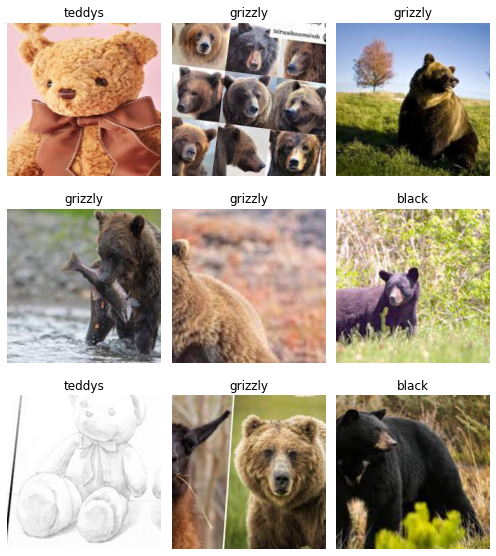

In [0]:
data.show_batch(rows=3, figsize=(7,8)) # data를 보여준다. data 갯수는 3*3(9)개. 

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds) 
# data의 classes와 classes 원소의 갯수, train data 갯수, valid data의 갯수를 차례로 출력한다. 
# train data는 384개, valid data는 96개(전체 data 갯수(480)의 20%)

(['black', 'grizzly', 'teddys'], 3, 384, 96)

## Train model

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate) # fastai에서 제공하는 ResNet34 Model을 가져온다. 

In [0]:
learn.fit_one_cycle(4) # 4 epochs만큼 학습한다.  

epoch,train_loss,valid_loss,error_rate,time
0,1.216024,0.190829,0.083333,00:05
1,0.652486,0.275888,0.052083,00:04
2,0.464551,0.305951,0.041667,00:04
3,0.351724,0.297835,0.041667,00:04


In [0]:
learn.save('stage-1') # 학습한 것을 'stage-1'으로 저장한다. 

In [0]:
learn.unfreeze() 
# when we learn.save() a model, does it freeze it by default.
# we need to unfreeze the learner before we can retrain it.

In [0]:
learn.lr_find() # learning rate를 구한다. 

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


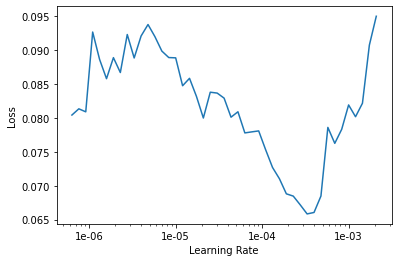

In [0]:
# If the plot is not showing try to give a start and end learning rate
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot() # lr과 loss의 상관관계를 graph로 나타낸다. 

In [0]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4)) # learning rate를 slice하여 2 epochs만큼 학습시킨다. 

epoch,train_loss,valid_loss,error_rate,time
0,0.084978,0.312234,0.041667,00:05
1,0.077461,0.286602,0.052083,00:05


In [0]:
learn.save('stage-2') # 학습한 것을 'stage-2'로 저장한다. 

## Interpretation

In [0]:
learn.load('stage-2'); # 'stage-2'를 불러온다. 

In [0]:
interp = ClassificationInterpretation.from_learner(learn) # ClassificationInterpretation을 생성, interp에 저장한다. (a confusion matrix를 보기 위함.)

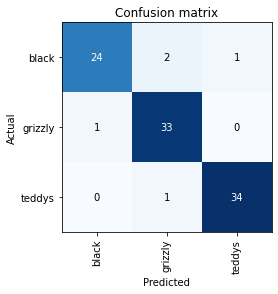

In [0]:
interp.plot_confusion_matrix() # a confusion matrix를 보여준다. 

## Cleaning Up

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be.

Using the `ImageCleaner` widget from `fastai.widgets` we can prune our top losses, removing photos that don't belong.

In [0]:
from fastai.widgets import * # fastai.widgets의 모든 module을 import한다. 
# 이 module을 통해 필요없는 images를 delete할 것이다. 

First we need to get the file paths from our top_losses. We can do this with `.from_toplosses`. We then feed the top losses indexes and corresponding dataset to `ImageCleaner`.

Notice that the widget will not delete images directly from disk but it will create a new csv file `cleaned.csv` from where you can create a new ImageDataBunch with the corrected labels to continue training your model.

In order to clean the entire set of images, we need to create a new dataset without the split. The video lecture demostrated the use of the `ds_type` param which no longer has any effect. See [the thread](https://forums.fast.ai/t/duplicate-widget/30975/10) for more details.

In [0]:
db = (ImageList.from_folder(path).split_none().label_from_folder().transform(get_transforms(), size=224).databunch())
# widgets을 통해 cleaned.csv를 만들어줄 거임. loss가 높은 파일들을 삭제하지 않고 cleaned.csv에 따로 모아준다. 
# images 삭제하기 위해 분리되지 않은 새로운 dataset가 필요함. 
# imageList -> from folder(path)(folder에서 images를 가져옴) -> split_none()(나누지 않음) 
# -> label_from_folder()(folder로부터 label을 얻음) -> transform() -> databunch() 

In [0]:
# If you already cleaned your data using indexes from `from_toplosses`,
# run this cell instead of the one before to proceed with removing duplicates.
# Otherwise all the results of the previous step would be overwritten by
# the new run of `ImageCleaner`.

# db = (ImageList.from_csv(path, 'cleaned.csv', folder='.')
#                    .split_none()
#                    .label_from_df()
#                    .transform(get_transforms(), size=224)
#                    .databunch()
#      )

Then we create a new learner to use our new databunch with all the images.

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate) # clean data(db)를 가지고 learner를 생성한다. 

learn_cln.load('stage-2'); # 'stage-2' model을 load한다.  

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)
# from_toplosses()를 통해 문제점이 많은 images를 가져오고, DatasetFormatter()가 widget module을 위한 dataset을 준비한다. 

Make sure you're running this notebook in Jupyter Notebook, not Jupyter Lab. That is accessible via [/tree](/tree), not [/lab](/lab). Running the `ImageCleaner` widget in Jupyter Lab is [not currently supported](https://github.com/fastai/fastai/issues/1539).

In [0]:
# Don't run this in google colab or any other instances running jupyter lab.
# If you do run this on Jupyter Lab, you need to restart your runtime and
# runtime state including all local variables will be lost.
ImageCleaner(ds, idxs, path)

'No images to show :)'


If the code above does not show any GUI(contains images and buttons) rendered by widgets but only text output, that may caused by the configuration problem of ipywidgets. Try the solution in this [link](https://github.com/fastai/fastai/issues/1539#issuecomment-505999861) to solve it.


Flag photos for deletion by clicking 'Delete'. Then click 'Next Batch' to delete flagged photos and keep the rest in that row. `ImageCleaner` will show you a new row of images until there are no more to show. In this case, the widget will show you images until there are none left from `top_losses.ImageCleaner(ds, idxs)`

You can also find duplicates in your dataset and delete them! To do this, you need to run `.from_similars` to get the potential duplicates' ids and then run `ImageCleaner` with `duplicates=True`. The API works in a similar way as with misclassified images: just choose the ones you want to delete and click 'Next Batch' until there are no more images left.

Make sure to recreate the databunch and `learn_cln` from the `cleaned.csv` file. Otherwise the file would be overwritten from scratch, losing all the results from cleaning the data from toplosses.

In [0]:
ds, idxs = DatasetFormatter().from_similars(learn_cln) # 비슷한 images도 dataset으로 묶어버린다. 

Getting activations...


Computing similarities...


In [0]:
ImageCleaner(ds, idxs, path, duplicates=True) 
# ImageCleaner() creates a 'cleaned.csv' file in your data path from which you need to load your new databunch for the files to changes to be applied.

Remember to recreate your ImageDataBunch from your `cleaned.csv` to include the changes you made in your data!

## Putting your model in production

First thing first, let's export the content of our `Learner` object for production:

In [0]:
learn.export() # directory에 'export.pkl'라는 이름의 파일이 create된다.  

This will create a file named 'export.pkl' in the directory where we were working that contains everything we need to deploy our model (the model, the weights but also some metadata like the classes or the transforms/normalization used).

You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:

In [0]:
defaults.device = torch.device('cpu') # CPU infrence on GPU trained model
# link : https://forums.fast.ai/t/cpu-infrence-on-gpu-trained-model/40834

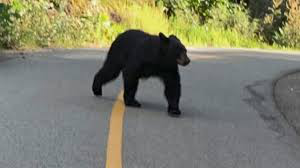

In [0]:
img = open_image(path/'black'/'00000021.jpg')
img

We create our `Learner` in production enviromnent like this, just make sure that `path` contains the file 'export.pkl' from before.

In [0]:
learn = load_learner(path)

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class
# img를 예측한 category.

Category black

So you might create a route something like this ([thanks](https://github.com/simonw/cougar-or-not) to Simon Willison for the structure of this code):

```python
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })
```

(This example is for the [Starlette](https://www.starlette.io/) web app toolkit.)

## Things that can go wrong

- Most of the time things will train fine with the defaults
- There's not much you really need to tune (despite what you've heard!)
- Most likely are
  - Learning rate
  - Number of epochs

### Learning rate (LR) too high

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(1, max_lr=0.5)
# lr이 높을 때 error_rate 64%. 

epoch,train_loss,valid_loss,error_rate,time
0,24.705198,154202112.000000,0.645833,00:05


### Learning rate (LR) too low

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Previously we had this result:

```
Total time: 00:57
epoch  train_loss  valid_loss  error_rate
1      1.030236    0.179226    0.028369    (00:14)
2      0.561508    0.055464    0.014184    (00:13)
3      0.396103    0.053801    0.014184    (00:13)
4      0.316883    0.050197    0.021277    (00:15)
```

In [0]:
learn.fit_one_cycle(5, max_lr=1e-5)
# lr이 낮을 때 error_rate 60%.

epoch,train_loss,valid_loss,error_rate,time
0,2.063862,1.893717,0.770833,00:05
1,1.960733,1.523909,0.666667,00:05
2,1.930737,1.333064,0.604167,00:05
3,1.885519,1.296457,0.562500,00:05
4,1.861286,1.277528,0.541667,00:05


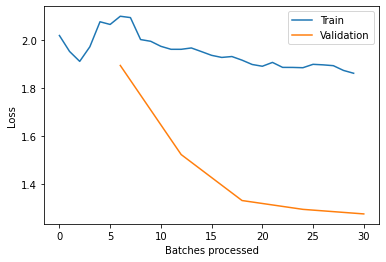

In [0]:
learn.recorder.plot_losses()

As well as taking a really long time, it's getting too many looks at each image, so may overfit.

### Too few epochs

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, pretrained=False)

In [0]:
learn.fit_one_cycle(1)
# epoch이 1일 때 error_rate 43%. 

epoch,train_loss,valid_loss,error_rate,time
0,1.539571,1.047858,0.437500,00:05


### Too many epochs

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=32, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [0]:
learn.fit_one_cycle(40, slice(1e-6,1e-4))
# epochs이 클 때 error_rate의 변화를 보여준다. 

epoch,train_loss,valid_loss,error_rate,time
0,1.726506,1.893239,0.645833,00:05
1,1.741410,1.709220,0.634259,00:03
2,1.769472,1.539189,0.618056,00:03
3,1.703695,1.384950,0.583333,00:03
4,1.650402,1.202888,0.550926,00:03
5,1.545679,1.029167,0.488426,00:03
6,1.436924,0.866165,0.379630,00:03
7,1.333347,0.713500,0.310185,00:03
8,1.217681,0.594828,0.238426,00:03
9,1.108706,0.507427,0.212963,00:03
